 <div style="text-align: center;"><div  style="color:#7f0000; font-size:30px; font-weight:bold; line-height:40px;">BigMartSell</div></div>
<div style="text-align: center; color:#006666"><strong>Owner: </strong>Mohit kumar</div>
<div style="text-align: center; color:#006666"><strong>Mail ID: </strong>mohitujjain@gmail.com</div>
<div style="text-align: center; color:#006666"><strong>Linkedin ID: </strong>https://https://www.linkedin.com/in/mohit-kumar-61bb20198/</div>
<div style="text-align: center; color:#006666"><strong>GitHub: </strong>https://github.com/Mohitujjain/</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import os
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
os.getcwd()

'C:\\Users\\DELL\\OneDrive\\Python_EDA_LR_LogR_Updated6June'

In [5]:
os.chdir("C:\\Users\\DELL\\OneDrive\\Desktop\\DATA\\BigMartSales")

In [6]:
train=pd.read_csv("sale_train.csv")
test=pd.read_csv("sales_test.csv")

In [7]:
train.shape

(8523, 12)

In [8]:
test.shape

(5681, 11)

In [9]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [11]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [13]:
##Consolidating data for EDA()   (merging two data set in one)
np.min(train['Item_Outlet_Sales'])
np.max(train['Item_Outlet_Sales'])

bmart=train.append(test)

In [14]:
bmart.shape

(14204, 12)

In [15]:
bmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
df=pd.concat([train.isnull().sum(),test.isnull().sum(),bmart.isnull().sum()],axis="columns",keys=['train','test','bmart'])
df

,train,test,bmart
Item_Identifier,0,0.0,0
Item_Weight,1463,976.0,2439
Item_Fat_Content,0,0.0,0
Item_Visibility,0,0.0,0
Item_Type,0,0.0,0
Item_MRP,0,0.0,0
Outlet_Identifier,0,0.0,0
Outlet_Establishment_Year,0,0.0,0
Outlet_Size,2410,1606.0,4016
Outlet_Location_Type,0,0.0,0


In [17]:
bmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [18]:
bmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [19]:
#EDA
#Univariate Analysis 
bmart['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [20]:
bmart['Item_Fat_Content']=bmart['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')

In [21]:
bmart['Item_Fat_Content']=bmart['Item_Fat_Content'].replace(['reg'],'Regular')

In [22]:
np.round(bmart['Item_Fat_Content'].value_counts(normalize=True)*100,0)

Low Fat    65.0
Regular    35.0
Name: Item_Fat_Content, dtype: float64

<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

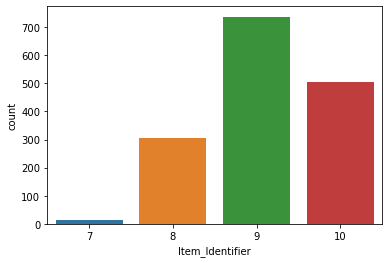

In [23]:
sns.countplot(bmart['Item_Identifier'].value_counts())

In [24]:
bmart['Item_Identifier'].str[:2].value_counts(normalize=True)

FD    0.718178
NC    0.189102
DR    0.092720
Name: Item_Identifier, dtype: float64

In [25]:
bmart['Item_MRP'].describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

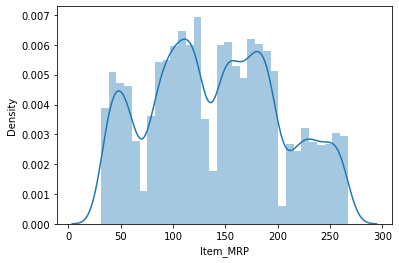

In [26]:
sns.distplot(bmart['Item_MRP'])

<AxesSubplot:>

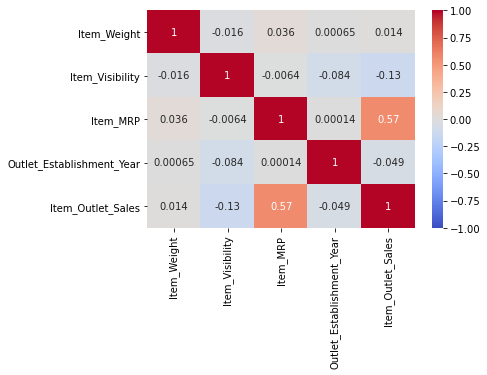

In [27]:
sns.heatmap(bmart.corr(),annot=True,vmin=-1,vmax=1,center=0,cmap='coolwarm')

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

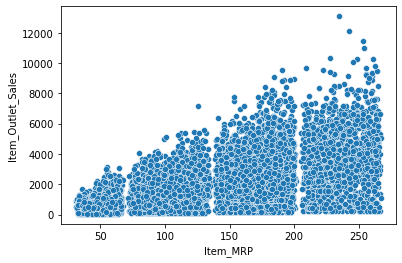

In [28]:
sns.scatterplot(bmart['Item_MRP'],bmart['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_MRP'>

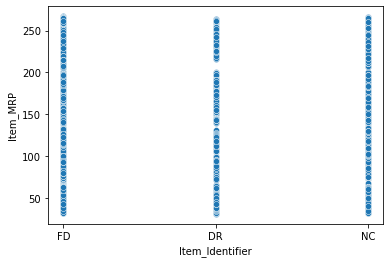

In [29]:
sns.scatterplot(bmart['Item_Identifier'].str[:2],bmart['Item_MRP'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Type'>

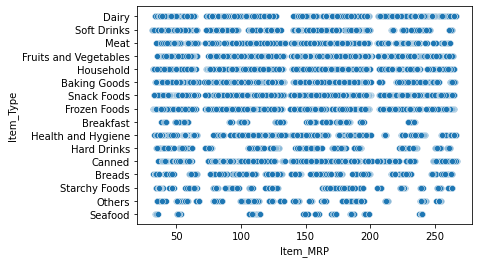

In [30]:
sns.scatterplot(bmart['Item_MRP'],bmart['Item_Type'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Outlet_Type'>

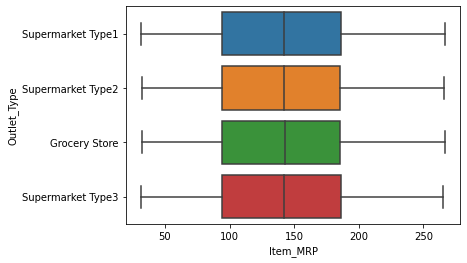

In [31]:
sns.boxplot(y=bmart['Outlet_Type'],x=bmart['Item_MRP'])

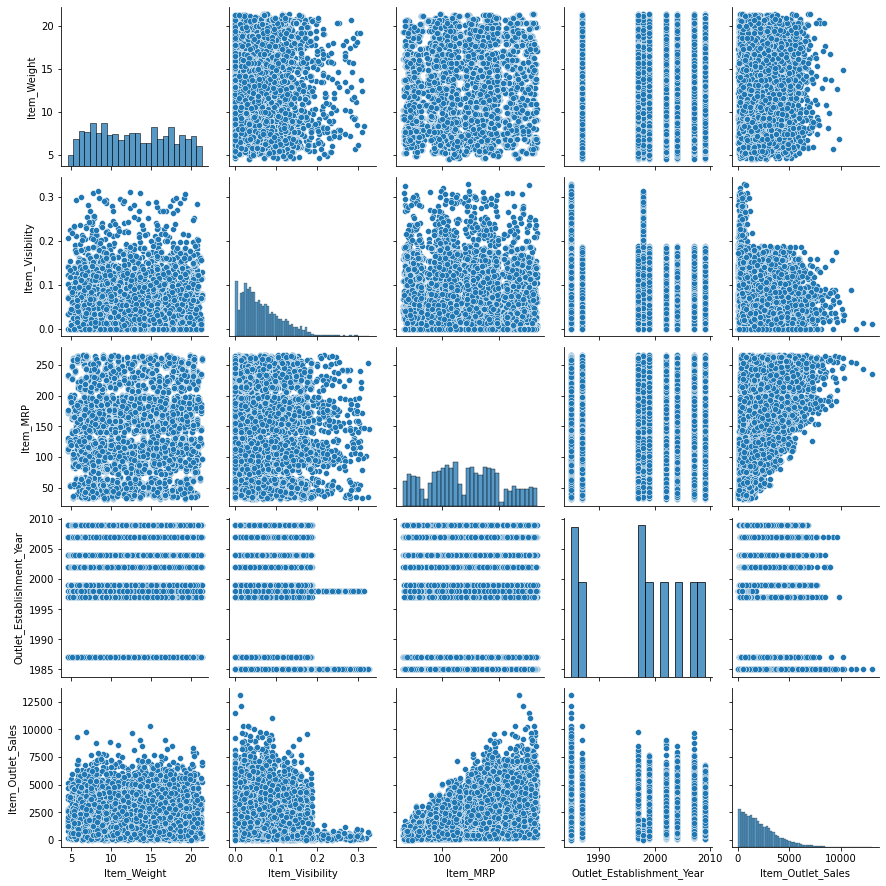

In [32]:
sns.pairplot(bmart)

<AxesSubplot:xlabel='Item_MRP', ylabel='Outlet_Identifier'>

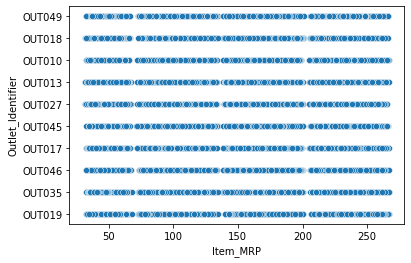

In [33]:
sns.scatterplot(bmart['Item_MRP'],bmart['Outlet_Identifier'])

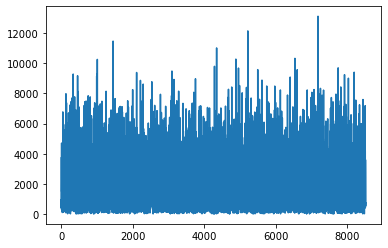

In [34]:
plt.plot(bmart['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

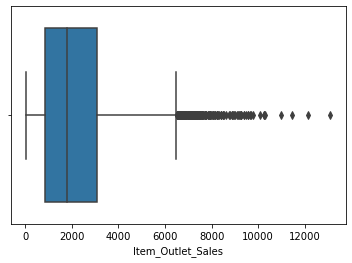

In [35]:
sns.boxplot(bmart['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

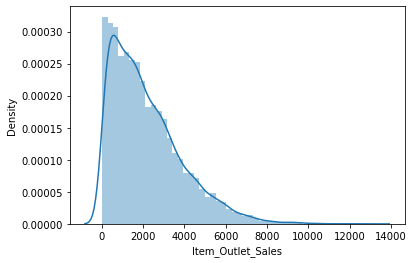

In [36]:
sns.distplot(train['Item_Outlet_Sales'])

In [37]:
# Item Type
bmart['Item_Type'].value_counts()


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Type'>

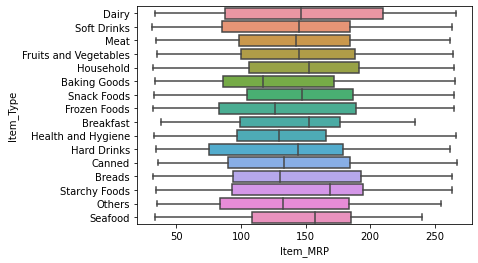

In [38]:
sns.boxplot(y=bmart['Item_Type'],x=bmart['Item_MRP'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

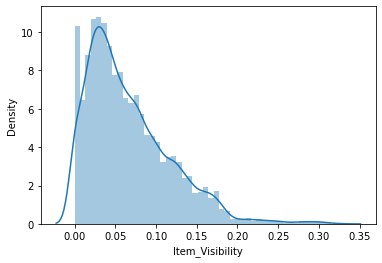

In [39]:
# Item_Visibility
sns.distplot(bmart['Item_Visibility'])

In [40]:
bmart['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

<AxesSubplot:xlabel='Item_Visibility'>

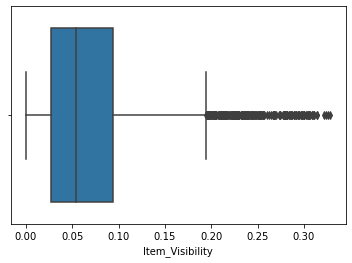

In [41]:
sns.boxplot(bmart['Item_Visibility'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

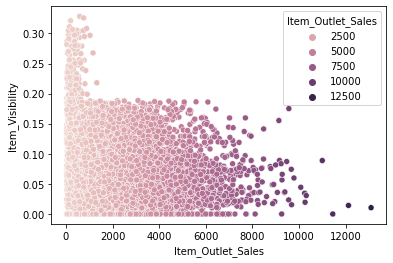

In [42]:
sns.scatterplot(x='Item_Outlet_Sales',y='Item_Visibility',data=bmart,hue='Item_Outlet_Sales')

In [43]:
m3s=np.mean(bmart['Item_Visibility'])+3*np.std(bmart['Item_Visibility'])

In [44]:
print(bmart[bmart['Item_Visibility']>m3s]['Item_Visibility'].count())
print(bmart[bmart['Item_Visibility']>m3s]['Item_Visibility'].count()/bmart.shape[0])

173
0.01217966769923965


In [45]:
p99=np.percentile(bmart['Item_Visibility'],99)

In [46]:
print(bmart[bmart['Item_Visibility']>np.percentile(bmart['Item_Visibility'],99)]['Item_Visibility'].count())
print(bmart[bmart['Item_Visibility']>np.percentile(bmart['Item_Visibility'],99)]['Item_Visibility'].count()/bmart.shape[0])

143
0.010067586595325261


In [47]:
bmart['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [48]:
bmart.loc[(bmart.Item_Visibility>p99),'Item_Visibility']=p99

In [49]:
bmart['Item_Visibility'].describe()

count    14204.000000
mean         0.065558
std          0.049957
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.230385
Name: Item_Visibility, dtype: float64

In [50]:
bmart[bmart['Item_Visibility']>p99].count()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

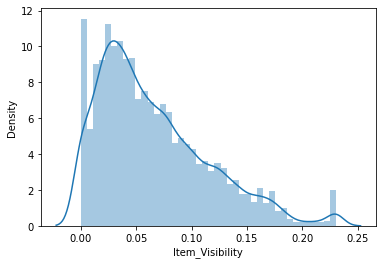

In [51]:
# sns.distplot(np.sqrt(bmart['Item_Visibility']))
sns.distplot(bmart['Item_Visibility'])
plt.show()

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

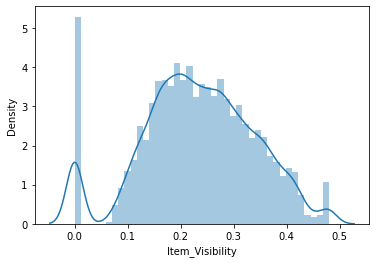

In [52]:
sns.distplot(np.sqrt(bmart['Item_Visibility']))

<AxesSubplot:xlabel='Item_Visibility'>

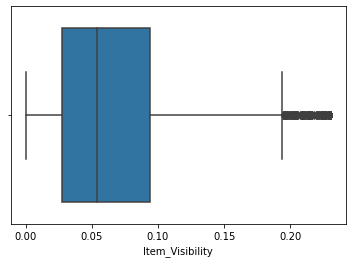

In [53]:
sns.boxplot(bmart['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility'>

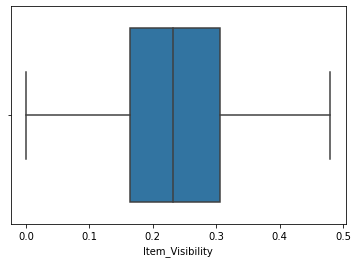

In [54]:
sns.boxplot(np.sqrt(bmart['Item_Visibility']))

In [55]:
bmart['Item_Visibility_SQRT']=np.sqrt(bmart['Item_Visibility'])

In [56]:
#Replacing 0 Item visitbility to mean
mean0=np.mean(bmart[bmart['Item_Visibility_SQRT']>0]['Item_Visibility_SQRT'])
print(mean0)

0.24844219377236626


In [57]:
np.mean(bmart['Item_Visibility_SQRT'])

0.23306760292993384

In [58]:
bmart['Item_Visibility_SQRT']=bmart['Item_Visibility_SQRT'].replace(0,mean0)

<AxesSubplot:xlabel='Item_Visibility_SQRT', ylabel='Density'>

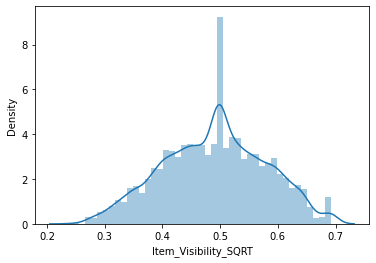

In [59]:
sns.distplot(np.sqrt(bmart['Item_Visibility_SQRT']))

In [60]:
bmart.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_SQRT
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.126678
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.138846
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.129461
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0.248442
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.248442


In [61]:
bmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Visibility_SQRT            0
dtype: int64

In [62]:
bmart['Item_Weight'].isnull().sum()

2439

<AxesSubplot:xlabel='Item_Weight'>

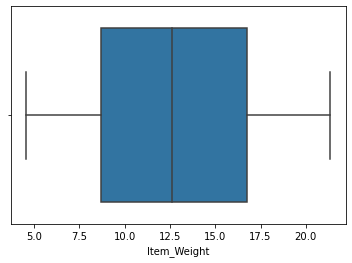

In [63]:
sns.boxplot(bmart['Item_Weight'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Type'>

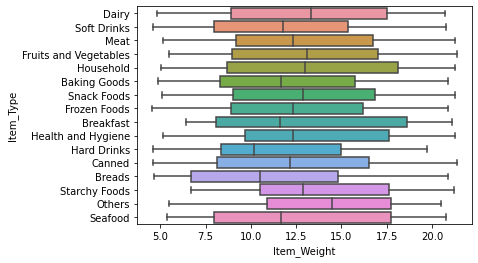

In [64]:
sns.boxplot(x=bmart['Item_Weight'],y=bmart['Item_Type'])#check weight and type of item#

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Weight'>

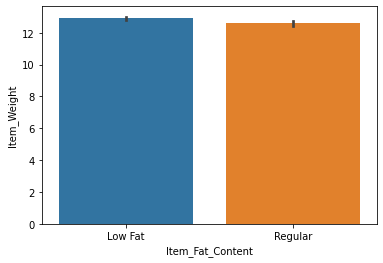

In [65]:
sns.barplot(x=bmart['Item_Fat_Content'],y=bmart['Item_Weight'])#check fat in item weight in low & regular#

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Weight'>

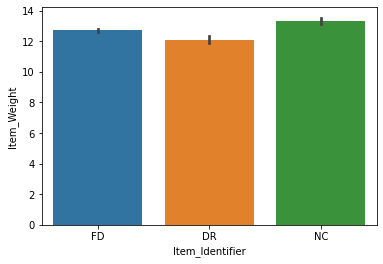

In [66]:
sns.barplot(x=bmart['Item_Identifier'].str[:2],y=bmart['Item_Weight'])#check weight in identifier(FD,DR,NC) #

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Weight'>

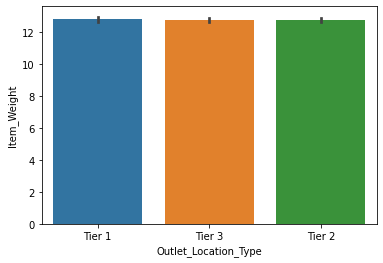

In [67]:
sns.barplot(x=bmart['Outlet_Location_Type'],y=bmart['Item_Weight'])#check location type(Tier1,Tier2,Tier3)#

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Weight'>

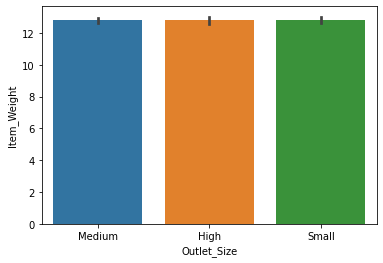

In [68]:
sns.barplot(x=bmart['Outlet_Size'],y=bmart['Item_Weight'])#check size medium,high,small#

<AxesSubplot:xlabel='Item_Weight', ylabel='Outlet_Type'>

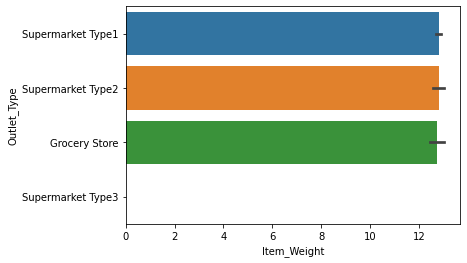

In [69]:
sns.barplot(y=bmart['Outlet_Type'],x=bmart['Item_Weight'])#check type of item outlet type#

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Type'>

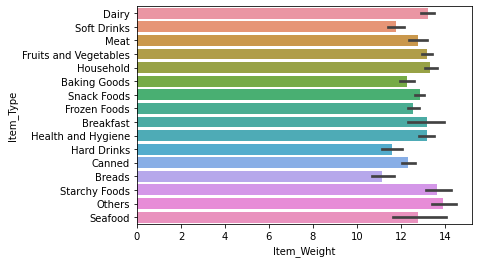

In [70]:
sns.barplot(y=bmart['Item_Type'],x=bmart['Item_Weight']) #check item type in item wt#

In [71]:
pd.crosstab(bmart['Item_Type'],bmart['Item_Weight'].isnull())

Item_Weight,False,True
Item_Type,,
Baking Goods,900,186
Breads,343,73
Breakfast,152,34
Canned,898,186
Dairy,941,195
Frozen Foods,1175,251
Fruits and Vegetables,1667,346
Hard Drinks,303,59
Health and Hygiene,710,148


In [72]:
bmart['Item_Weight']=bmart['Item_Weight'].fillna(bmart['Item_Weight'].groupby(bmart['Item_Type']).transform('mean'))

In [73]:
bmart['Item_Weight'].isnull().sum()

0

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

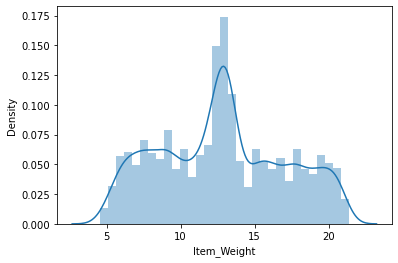

In [74]:
sns.distplot(bmart['Item_Weight'])

In [75]:
bmart['Outlet_Establishment_Year'].describe()#check  the outlet esstablishment year#  starting to Outlet_Size nullvalue dismised

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [76]:
bmart['Tenure']=2020-bmart['Outlet_Establishment_Year']#check tenure(karyakal) in 2020-bmart_Establishment_year#

In [77]:
bmart['Tenure'].describe()

count    14204.000000
mean        22.169319
std          8.371664
min         11.000000
25%         16.000000
50%         21.000000
75%         33.000000
max         35.000000
Name: Tenure, dtype: float64

<AxesSubplot:xlabel='Tenure', ylabel='Density'>

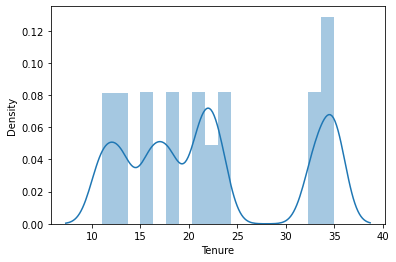

In [78]:
sns.distplot(bmart['Tenure'])#show in tenure#

In [79]:
bmart['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [80]:
bmart['Outlet_Location_Type'].value_counts() #check outlet location type and count the value#

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [81]:
pd.crosstab(bmart['Outlet_Location_Type'],bmart['Outlet_Identifier'])

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Location_Type,,,,,,,,,,
Tier 1,0,0,0,0,880,0,0,0,1550,1550
Tier 2,0,0,1543,0,0,0,1550,1548,0,0
Tier 3,925,1553,0,1546,0,1559,0,0,0,0


In [82]:
pd.crosstab(bmart['Outlet_Location_Type'],bmart['Outlet_Identifier'])

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Location_Type,,,,,,,,,,
Tier 1,0,0,0,0,880,0,0,0,1550,1550
Tier 2,0,0,1543,0,0,0,1550,1548,0,0
Tier 3,925,1553,0,1546,0,1559,0,0,0,0


In [83]:
bmart['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [84]:
pd.crosstab(bmart['Outlet_Location_Type'],bmart['Outlet_Identifier'])

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Location_Type,,,,,,,,,,
Tier 1,0,0,0,0,880,0,0,0,1550,1550
Tier 2,0,0,1543,0,0,0,1550,1548,0,0
Tier 3,925,1553,0,1546,0,1559,0,0,0,0


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

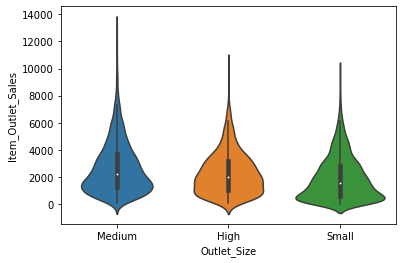

In [85]:
sns.violinplot(bmart['Outlet_Size'],bmart['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

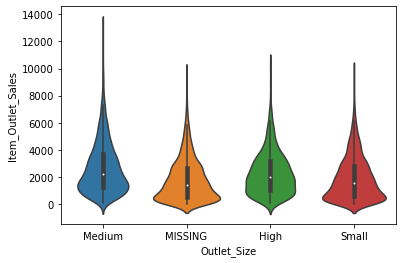

In [86]:
sns.violinplot(bmart['Outlet_Size'].fillna("MISSING"),bmart['Item_Outlet_Sales'])#we add missing value through fillna and again 
                                                                                #watch the volinplot graph#

In [87]:
bmart['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [88]:
bmart['Outlet_Size']=bmart['Outlet_Size'].fillna("Small")#we fill all  null value in small through fillna#

In [89]:
bmart['Outlet_Size'].value_counts()#after filling null value  all in small total count#

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

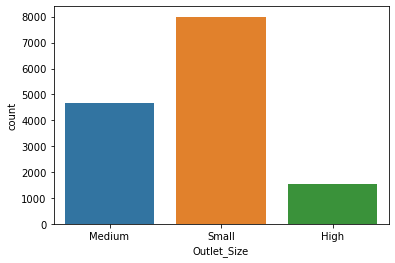

In [90]:
sns.countplot(bmart['Outlet_Size'])#showing total size graph#

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

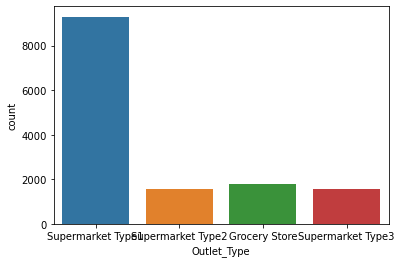

In [91]:
sns.countplot(bmart['Outlet_Type'])  #check outlet count in outlet_Type#

In [92]:
bmart['Outlet_Type'].value_counts()  #showing in outlet_type in count#

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [93]:
bmart.isnull().sum()  

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Visibility_SQRT            0
Tenure                          0
dtype: int64

In [94]:
print(bmart.shape)
# print(train_cl.shape)
# print(test_cl.shape)

(14204, 14)


In [95]:
bmart.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_SQRT,Tenure
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.126678,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.138846,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.129461,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,0.248442,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.248442,33


In [96]:
bmart['Item_Identifier_1']=bmart['Item_Identifier'].str[:2]

In [97]:
bmart.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Visibility_SQRT            0
Tenure                          0
Item_Identifier_1               0
dtype: int64

In [98]:
bmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Visibility_SQRT       14204 non-null  float64
 13  Tenure                     14204 non-null  int6

In [99]:
bmart.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_SQRT,Tenure,Item_Identifier_1
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.126678,21,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.138846,11,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.129461,21,FD


In [100]:
train_cl=bmart[bmart['Item_Outlet_Sales'].notnull()]
test_cl=bmart[bmart['Item_Outlet_Sales'].isnull()]

In [101]:
train_cl.drop(['Item_Identifier','Item_Visibility','Outlet_Establishment_Year'],axis=1,inplace=True)

In [102]:
train_cl.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Item_Visibility_SQRT    0
Tenure                  0
Item_Identifier_1       0
dtype: int64

In [103]:
train_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Type             8523 non-null   object 
 3   Item_MRP              8523 non-null   float64
 4   Outlet_Identifier     8523 non-null   object 
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Item_Visibility_SQRT  8523 non-null   float64
 10  Tenure                8523 non-null   int64  
 11  Item_Identifier_1     8523 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [104]:
test_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  Item_Outlet_Sales          0 non-null      float64
 12  Item_Visibility_SQRT       5681 non-null   float64
 13  Tenure                     5681 non-null   int64

In [105]:
test_cl.drop(['Item_Identifier','Item_Visibility','Outlet_Establishment_Year'],axis=1,inplace=True)

In [106]:
print(train_cl.shape)
print(test_cl.shape)

(8523, 12)
(5681, 12)


In [107]:
train_cl=pd.get_dummies(train_cl,drop_first=True)
test_cl=pd.get_dummies(test_cl,drop_first=True)

In [108]:
print(train_cl.shape)
print(test_cl.shape)

(8523, 39)
(5681, 39)


# Model Building

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics

In [110]:
train_Y=train_cl['Item_Outlet_Sales']
train_X=train_cl.drop('Item_Outlet_Sales',axis=1)

In [111]:
train_X.head(3)

,Item_Weight,Item_MRP,Item_Visibility_SQRT,Tenure,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_1_FD,Item_Identifier_1_NC
0,9.30,249.8092,0.126678,21,0,0,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0
1,5.92,48.2692,0.138846,11,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
2,17.50,141.6180,0.129461,21,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0


In [112]:
reg=LinearRegression()
reg.fit(train_X,train_Y)

LinearRegression()

In [113]:
print(reg.intercept_)
print(reg.coef_)

-1134.128700882367
[-3.27546806e-01  1.55707379e+01 -1.37884355e+02  1.75929822e+01
  4.21898827e+01  5.44900758e+00  6.01521583e+00  2.48029728e+01
 -5.09095876e+01 -2.82184332e+01  2.96147081e+01 -4.62157178e+01
 -3.78710014e+00 -3.34235617e+01 -1.36349547e+00 -1.53722413e+01
  1.84294436e+02 -1.17580240e+01 -7.38900002e+01  2.14684539e+01
  1.08928462e+02  3.08982754e+02  2.43957322e+02 -5.08812488e+02
  8.96402971e+02  2.95681626e+02  4.67675350e+01  6.80411969e+02
 -5.25826874e+02  6.14533419e+02 -7.23461881e+02  6.51431915e+02
 -2.97204523e+02  9.14945472e+02  2.43957322e+02  8.96402971e+02
 -4.69210844e+01 -5.25829031e+01]


In [114]:
 import statsmodels.api as sm

In [115]:
model=sm.OLS(train_Y,train_X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     378.4
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        19:00:17   Log-Likelihood:                -71988.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8493   BIC:                         1.442e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_Weight                        -0.3275      2.919     -0.112      0.911      -6.049       5.394
Item_MRP                           15.5707      0.198     78.586      0.000      15.182      15.959
Item_Visibility_SQRT             -137.8844    145.020     -0.951      0.342    -422.159     146.391
Tenure                             -9.5422      3.224     -2.959      0.003     -15.863      -3.221
Item_Fat_Content_Regular           42.1899     28.467      1.482      0.138     -13.613      97.992
Item_Type_Breads                    5.4490     84.070      0.065      0.948    -159.348     170.246
Item_Type_Breakfast                 6.0152    116.614      0.052      0.959    -222.576     234.606
Item_Type_Canned                   24.8030     62.776      0.395      0.693     -98.253     147.859
Item_Type_Dairy                   -50.9096     66.059     -0.771      0.441    -180.401      78.582
Item_Type_Frozen Foods            -28.2184     58.879     -0.479      0.632    -143.635      87.198
Item_Type_Fruits and Vegetables    29.6147     54.983      0.539      0.590     -78.165     137.394
Item_Type_Hard Drinks             -46.2157    139.641     -0.331      0.741    -319.947     227.515
Item_Type_Health and Hygiene       -3.7871     52.727     -0.072      0.943    -107.146      99.571
Item_Type_Household               -33.4236     47.697     -0.701      0.483    -126.921      60.074
Item_Type_Meat                     -1.3635     70.704     -0.019      0.985    -139.961     137.234
Item_Type_Others                  -15.3722     73.010     -0.211      0.833    -158.490     127.745
Item_Type_Seafood                 184.2944    148.015      1.245      0.213    -105.851     474.440
Item_Type_Snack Foods             -11.7580     55.266     -0.213      0.832    -120.092      96.576
Item_Type_Soft Drinks             -73.8900    128.030     -0.577      0.564    -324.860     177.080
Item_Type_Starchy Foods            21.4685    103.065      0.208      0.835    -180.564     223.501
Outlet_Identifier_OUT013          259.8061     26.176      9.925      0.000     208.495     311.117
Outlet_Identifier_OUT017          184.3282     33.689      5.471      0.000     118.290     250.366
Outlet_Identifier_OUT018           46.9803     29.683      1.583      0.114     -11.206     105.167
Outlet_Identifier_OUT019         -369.4882     31.837    -11.605      0.000    -431.897    -307.079
Outlet_Identifier_OUT027         1025.0480     23.568     43.493      0.000     978.849    1071.247
Outlet_Identifier_OUT035          252.4326     31.221      8.085      0.000     191.231     313.634
Outlet_Identifier_OUT045           57.7888     30.914      1.869      0.062      -2.810     118.387
Outlet_Identifier_OUT046          670.2268     29.380     22.812      0.000     612

In [116]:
print("Intercept:",reg.intercept_)

Intercept: -1134.128700882367


In [117]:
pd.DataFrame(reg.coef_,train_X.columns,columns=['Coefficient'])

,Coefficient
Item_Weight,-0.327547
Item_MRP,15.570738
Item_Visibility_SQRT,-137.884355
Tenure,17.592982
Item_Fat_Content_Regular,42.189883
Item_Type_Breads,5.449008
Item_Type_Breakfast,6.015216
Item_Type_Canned,24.802973
Item_Type_Dairy,-50.909588
Item_Type_Frozen Foods,-28.218433


In [118]:
pd.DataFrame(reg.coef_,train_X.columns)

,0
Item_Weight,-0.327547
Item_MRP,15.570738
Item_Visibility_SQRT,-137.884355
Tenure,17.592982
Item_Fat_Content_Regular,42.189883
Item_Type_Breads,5.449008
Item_Type_Breakfast,6.015216
Item_Type_Canned,24.802973
Item_Type_Dairy,-50.909588
Item_Type_Frozen Foods,-28.218433


In [119]:
model.params

Item_Weight                          -0.327547
Item_MRP                             15.570738
Item_Visibility_SQRT               -137.884355
Tenure                               -9.542193
Item_Fat_Content_Regular             42.189883
Item_Type_Breads                      5.449008
Item_Type_Breakfast                   6.015216
Item_Type_Canned                     24.802973
Item_Type_Dairy                     -50.909588
Item_Type_Frozen Foods              -28.218433
Item_Type_Fruits and Vegetables      29.614708
Item_Type_Hard Drinks               -46.215718
Item_Type_Health and Hygiene         -3.787100
Item_Type_Household                 -33.423562
Item_Type_Meat                       -1.363495
Item_Type_Others                    -15.372241
Item_Type_Seafood                   184.294436
Item_Type_Snack Foods               -11.758024
Item_Type_Soft Drinks               -73.890000
Item_Type_Starchy Foods              21.468454
Outlet_Identifier_OUT013            259.806116
Outlet_Identi

In [120]:
test_cl.drop('Item_Outlet_Sales',axis=1,inplace=True)

In [121]:
 m_ols=model.predict(test_cl)

In [122]:
# m_ols=model.predict(test_cl)
m_lm=reg.predict(test_cl)

In [123]:
x=pd.concat([pd.DataFrame(m_ols),pd.DataFrame(m_lm)],axis=1)

In [124]:
x.to_csv("compare.csv")

In [125]:
predicted=pd.concat([test_cl,pd.DataFrame(m_lm)],axis=1)

In [126]:
predicted.to_csv("Prediction1_Basic Regression.csv")

In [127]:
test=bmart[bmart['Item_Outlet_Sales'].isnull()][['Item_Identifier','Outlet_Identifier']]

In [128]:
test=pd.concat([test,pd.DataFrame(m_lm)],axis=1)

In [129]:
test.columns

Index(['Item_Identifier', 'Outlet_Identifier', 0], dtype='object')

In [130]:
test.shape

(5681, 3)

In [131]:
pd.DataFrame(m_lm).shape

(5681, 1)

In [132]:
test=pd.concat([test,pd.DataFrame(m_lm)],axis=1)

In [133]:
test.to_csv("Prediction2.csv")

In [134]:
sm.OLS(train_Y,train_X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     378.4
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        19:00:20   Log-Likelihood:                -71988.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8493   BIC:                         1.442e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_Weight                        -0.3275      2.919     -0.112      0.911      -6.049       5.394
Item_MRP                           15.5707      0.198     78.586      0.000      15.182      15.959
Item_Visibility_SQRT             -137.8844    145.020     -0.951      0.342    -422.159     146.391
Tenure                             -9.5422      3.224     -2.959      0.003     -15.863      -3.221
Item_Fat_Content_Regular           42.1899     28.467      1.482      0.138     -13.613      97.992
Item_Type_Breads                    5.4490     84.070      0.065      0.948    -159.348     170.246
Item_Type_Breakfast                 6.0152    116.614      0.052      0.959    -222.576     234.606
Item_Type_Canned                   24.8030     62.776      0.395      0.693     -98.253     147.859
Item_Type_Dairy                   -50.9096     66.059     -0.771      0.441    -180.401      78.582
Item_Type_Frozen Foods            -28.2184     58.879     -0.479      0.632    -143.635      87.198
Item_Type_Fruits and Vegetables    29.6147     54.983      0.539      0.590     -78.165     137.394
Item_Type_Hard Drinks             -46.2157    139.641     -0.331      0.741    -319.947     227.515
Item_Type_Health and Hygiene       -3.7871     52.727     -0.072      0.943    -107.146      99.571
Item_Type_Household               -33.4236     47.697     -0.701      0.483    -126.921      60.074
Item_Type_Meat                     -1.3635     70.704     -0.019      0.985    -139.961     137.234
Item_Type_Others                  -15.3722     73.010     -0.211      0.833    -158.490     127.745
Item_Type_Seafood                 184.2944    148.015      1.245      0.213    -105.851     474.440
Item_Type_Snack Foods             -11.7580     55.266     -0.213      0.832    -120.092      96.576
Item_Type_Soft Drinks             -73.8900    128.030     -0.577      0.564    -324.860     177.080
Item_Type_Starchy Foods            21.4685    103.065      0.208      0.835    -180.564     223.501
Outlet_Identifier_OUT013          259.8061     26.176      9.925      0.000     208.495     311.117
Outlet_Identifier_OUT017          184.3282     33.689      5.471      0.000     118.290     250.366
Outlet_Identifier_OUT018           46.9803     29.683      1.583      0.114     -11.206     105.167
Outlet_Identifier_OUT019         -369.4882     31.837    -11.605      0.000    -431.897    -307.079
Outlet_Identifier_OUT027         1025.0480     23.568     43.493      0.000     978.849    1071.247
Outlet_Identifier_OUT035          252.4326     31.221      8.085      0.000     191.231     313.634
Outlet_Identifier_OUT045           57.7888     30.914      1.869      0.062      -2.810     118.387
Outlet_Identifier_OUT046          670.2268     29.380     22.812      0.000     612

In [135]:
train_cl.columns

Index(['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility_SQRT',
       'Tenure', 'Item_Fat_Content_Regular', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
   

In [136]:
train_cl_Y=train_cl["Item_Outlet_Sales"]
train_cl_X=train_cl.drop("Item_Outlet_Sales",axis=1)

In [137]:
# print(train_cl_Y)
print(train_cl_X.columns)

Index(['Item_Weight', 'Item_MRP', 'Item_Visibility_SQRT', 'Tenure',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket

In [138]:
X_train,X_test,Y_train,Y_test=train_test_split(train_cl_X,train_cl_Y,train_size=0.8,random_state=101)

In [139]:
print(X_train.head(2))
print("--------------------------------------")
print(X_test.head(2))
print("--------------------------------------")
print(Y_train.head(2))
print("--------------------------------------")
print(Y_test.head(2))

      Item_Weight  Item_MRP  Item_Visibility_SQRT  Tenure  \
3684        19.25   54.6956              0.318887      33   
1935         7.63   94.6436              0.247810      13   

      Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
3684                         0                 0                    0   
1935                         0                 0                    0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  ...  \
3684                 0                1                       0  ...   
1935                 0                0                       0  ...   

      Outlet_Identifier_OUT049  Outlet_Size_Medium  Outlet_Size_Small  \
3684                         0                   0                  0   
1935                         0                   0                  1   

      Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
3684                            0                            1   
1935                       

In [140]:
Y_pred=reg.predict(X_test)

In [141]:
print("Mean Squared Error : ",mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("R2 : ",r2_score(Y_test,Y_pred))

Mean Squared Error :  1198780.183969653
Root Mean Squared Error :  1094.8882061515017
R2 :  0.5601395415046133


Text(0.5, 0.98, 'Actual vs Predicted')

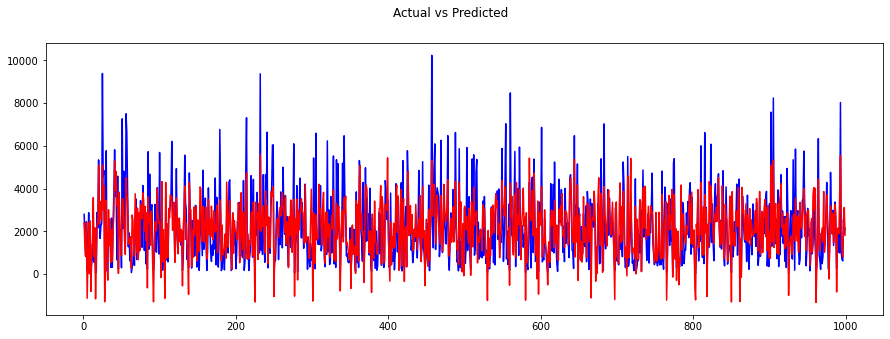

In [142]:
c=[i for i in range(1,1000,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,Y_test[1:1000],color="blue")
plt.plot(c,Y_pred[1:1000],color="red")
fig.suptitle("Actual vs Predicted")

In [143]:
print(Y_test.shape)
print(Y_pred.shape)

(1705,)
(1705,)


Text(0.5, 0.98, 'Error')

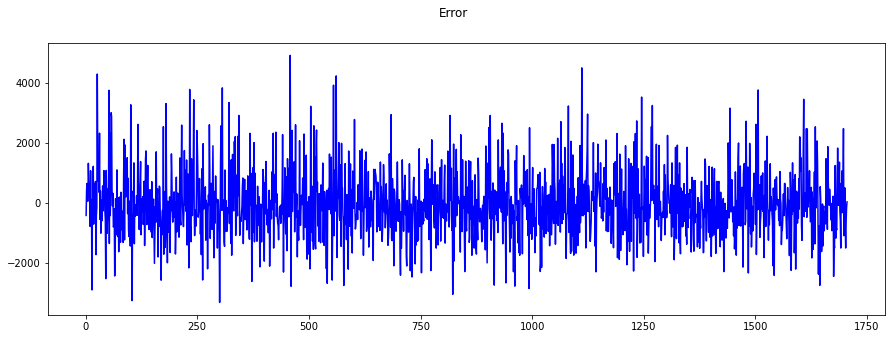

In [144]:
c=[i for i in range(1,1706,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,Y_test-Y_pred,color="blue")
fig.suptitle("Error")

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [146]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_cl_X.values, i) for i in range(train_cl_X.shape[1])]
vif["features"] = train_cl_X.columns

In [147]:
vif.round(2)

,VIF Factor,features
0,1.02,Item_Weight
1,1.02,Item_MRP
2,1.09,Item_Visibility_SQRT
3,inf,Tenure
4,1.24,Item_Fat_Content_Regular
5,1.35,Item_Type_Breads
6,1.16,Item_Type_Breakfast
7,1.85,Item_Type_Canned
8,2.15,Item_Type_Dairy
9,2.09,Item_Type_Frozen Foods


# Finish